# 1 Introduction
## 1.1 Background
Movie box office prediction can be very meaningful in practice. During pre-production casting period, investors can make better decisions about which production crew and actors to use. During pre-release period, it is good to know the box office expectations so that budget and timing of release can be adjusted accordingly. In addition, after film is moved onto the stage, theaters may want to determine how to arrange the time slots, or even shift viewers’ decision in movie selection. There are many factors that can affect the open weekend gross of a movie such as production, crew, genre, release date, whether it is a sequel and so on. Statistics and reviews in the first week also say a lot. 

## 1.2 Problem Statement
Our project aims to predict opening weekend box office and overall box office based on history data from IMDB and also statistics of Goole Trend. And we are interested to know what features combined makes a movie more crowd pleasing, award winning, or even Oscar worthy. We will write our crawler to gather raw data from IMDB site using python scrapy. The primary features we want to take a closer look into includes (but not limited to) first week user reviews, first week box office earnings, actors, directors, movie keywords etc. We would like to try out several models to optimize training outcome, and use part of movies as our validation sample to validate our model selection.
## 1.3 Data Description
Our data is composed of 2 parts. The first part is the features we crawled from web pages of IMDB. Below is features we will extracted and used to train our model.

| Feature Name             | Feature Description                                |
|--------------------------|----------------------------------------------------|
| IMDB ID                  | ID of Movie in IMDB                                |
| Actors                   | Actors of this movie                               |
| Awards                   | Awards This Movie Earned                           |
| Box Office               | Total Box Office of the Movie                      |
| Country                  | Release Country                                    |
| Director                 | Director of this movie                             |
| Genres                   | Genres this movie belongs to                       |
| Language                 | released in which language                         |
| Production               | Production Company of This Movie                   |
| Rated                    | Rated: PG, R, PG13...                              |
| Release                  | Release Date of the Movie                          |
| Runtime                  | Duration of the movie                              |
| Title                    | Title of the movie                                 |
| Year                     | Release Year                                       |
| imdbRating               | IMDB Rating of the Movie                           |
| imdbVotes                | Votes Number of the Movie on IMDB                  |
| Opening Weekend USA      | Box office of the first week                       |
| budget                   | budge of the movie                                 |
| Critic Number            | Critic Number of the Movie on IMDB                 |
| user review number       | number of user reviews                             |

The second part of the dataset is Google Trend. <br>
<img style="float:center; width:300px" src='./google_trend.png'/><br>
Above is the format of our google trend data. The first row is the keywords that we use to request the google trend. The rest rows are the date and google trend of this keywork on that date. All the google trend is normalized to 0-100.

# 2 Methods of Extracting Data
The data collection method for model 1 is to use python’s library: Requests and beautiful soup to download and parse the html. We extract many features from the web page of imdb and filter out the movie that have box office to be our target information. We will store the information in CSV format, which will be easy for our model to read.


<img style="float:center; width:800px" src='./model1.png'/>


Because there’s no official API of google trend and it’s hard to use web scrapers to request the information we need, we use third-party API Pytrends to request the trend for us. We want to have the google trend of certain movie within range [one week before release date, one month after release date]. The result will also be stored in CSV format.
<img style="float:center; width:700px" src='./model2.png'/>

# 3 Data Exploration

In [1]:
import pandas as pd
with open('result.csv') as file:
    dataset = pd.read_csv(file)
    
with open('google_index.csv') as file:
    google_index = pd.read_csv(file)

First, we need to load the data from the csv file and store them as dataframes. The data will look like the below.

In [2]:
dataset[:2]

,imdbID,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,...,Writer,Year,imdbRating,imdbVotes,Cumulative Worldwide Gross,Gross USA,Opening Weekend USA,budget,critic number,user review number
0,tt0499549,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Won 3 Oscars. Another 85 wins & 128 nominations.,"$749,700,000","UK, USA",22 Apr 2010,James Cameron,"Action, Adventure, Fantasy","English, Spanish",83.0,...,James Cameron,2009.0,7.8,"985,058",2.787965e+09,760507625.0,77025481.0,237000000,720.0,3167.0
1,tt1055369,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",Nominated for 1 Oscar. Another 15 wins & 27 no...,"$402,076,689",USA,20 Oct 2009,Michael Bay,"Action, Adventure, Sci-Fi","English, Spanish",35.0,...,"Ehren Kruger, Roberto Orci, Alex Kurtzman",2009.0,6.0,"349,263",8.363037e+08,402111870.0,108966307.0,200000000,373.0,1459.0


In [3]:
google_index[:5]

,title,date_index0,date_index1,date_index10,date_index11,date_index12,date_index13,date_index14,date_index15,date_index16,...,date_index34,date_index35,date_index36,date_index37,date_index4,date_index5,date_index6,date_index7,date_index8,date_index9
0,Avatar,30,33,82,68,67,67,72,82,83,...,38,43,60,63,32,40,49,74,94,100
1,Pirates of the Caribbean: At World's End,17,25,73,50,37,30,32,50,32,...,10,12,8,16,30,27,35,63,86,100
2,Spectre,33,35,57,47,52,43,44,56,57,...,15,18,25,23,31,36,47,73,100,92
3,The Dark Knight Rises,12,14,58,46,46,39,38,43,43,...,11,10,13,14,25,28,38,91,100,83
4,John Carter,19,23,59,44,36,33,36,51,48,...,11,14,14,14,28,35,44,75,100,96


## 3.1 IMDB Ratings and Genres
First, we want to know whether genre is related to IMDB score. We extract the genres and rating of each movie and then store the data in a dictionary, whose key is genre and value is list of ratings that in this genre.

We then plot IMDB average ratings and genre.





In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from collections import defaultdict

genre_dict = defaultdict(list)

for index in range(len(dataset)):
    genres = dataset.iloc[index]['Genre'].split()
    for genre in genres:
        genre = genre.strip(' ,')
        genre_dict[genre].append(dataset.iloc[index]['imdbRating'])

keys = list(genre_dict.keys())
index = range(len(keys))
mean_ratings = [np.mean(genre_dict[x]) for x in genre_dict]


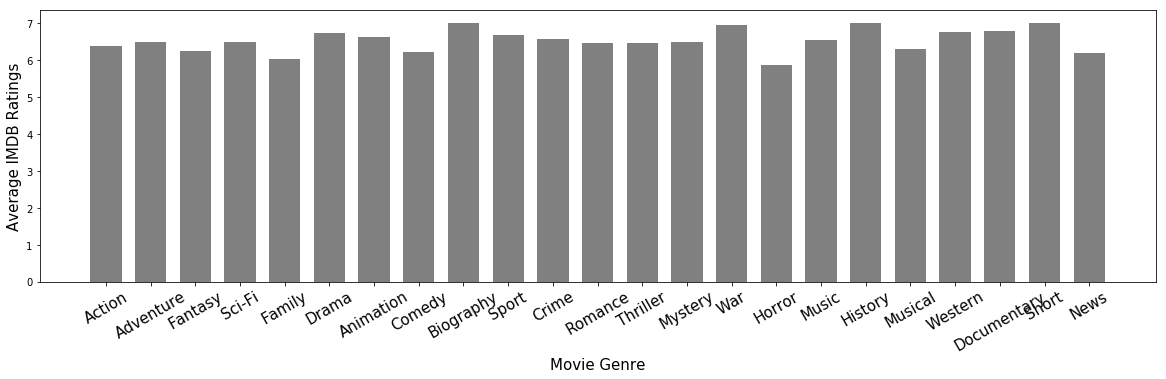

In [5]:
plt.figure(figsize=(20,5))
width = 0.7
ax=plt.subplot(111)
plt.bar(index, mean_ratings, width, color="grey")
plt.xticks(index, keys, fontsize=15, rotation=30)
plt.ylabel('Average IMDB Ratings',fontsize=15)
ax.set_xlabel("Movie Genre",fontsize=15)
plt.show()

## 3.2 Histogram of Movie Released
In this Sub-Section, we want to analyze number of movie that was released in each year. As we can see in below chart, our dataset doesn't contain enough data point. Because in common sense, the movie released in each movie should in a trend of increase.


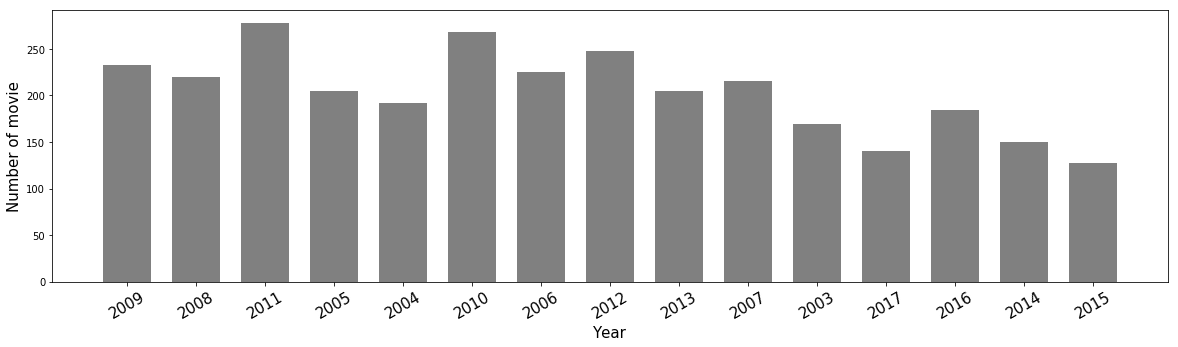

In [6]:
from collections import Counter
year_list = [str(int(x)) for x in dataset['Year']]
years = Counter(year_list)
keys = years.keys()
values = years.values()
index = range(len(keys))
plt.figure(figsize=(20,5))
ax=plt.subplot(111)
plt.bar(index, values, width, color="grey")
plt.xticks(index, keys, fontsize=15, rotation=30)
plt.ylabel('Number of movie',fontsize=15)
ax.set_xlabel("Year",fontsize=15)
plt.show()

## 3.3 Histogram of Top 20 Total Gross of Each Director

In [7]:
director_gross = defaultdict(int)
for index in range(len(dataset)):
    director = dataset.iloc[index]['Director']
    box_office = dataset.iloc[index]['Gross USA']
    director_gross[director] += box_office
director_gross = list(director_gross.items())
director_gross.sort(key = lambda x: x[1], reverse = True)


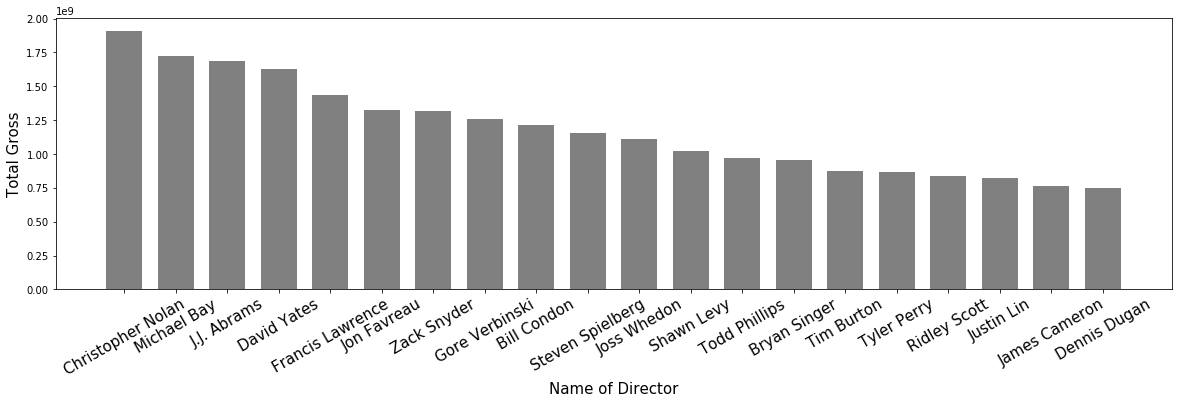

In [8]:
keys = [director_gross[x][0] for x in range(20)]
values = [director_gross[x][1] for x in range(20)]
index = range(len(keys))
plt.figure(figsize=(20,5))
ax=plt.subplot(111)
plt.bar(index, values, width, color="grey")
plt.xticks(index, keys, fontsize=15, rotation=30)
plt.ylabel('Total Gross',fontsize=15)
ax.set_xlabel("Name of Director",fontsize=15)
plt.show()

## 3.4 Opening Weekend Gross Distribution

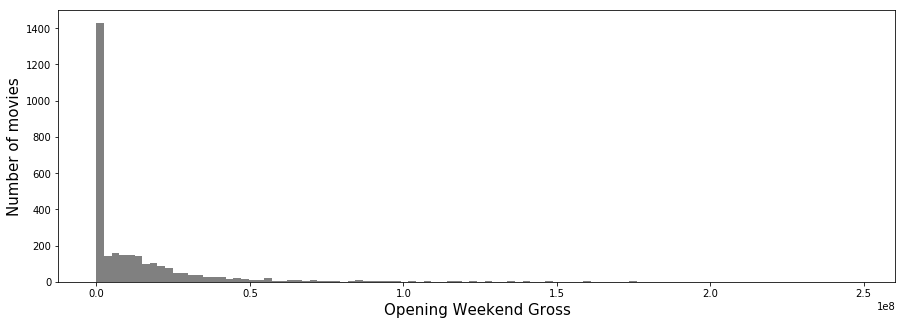

In [9]:
opening_weekend_gross = dataset['Opening Weekend USA'].dropna(axis=0, how='any')
plt.figure(figsize=(15,5))
plt.ylabel('Number of movies',fontsize=15)
plt.xlabel('Opening Weekend Gross',fontsize=15)
n, bins, patches = plt.hist(opening_weekend_gross, bins=100, color="grey")
plt.show()

We can see from the plot, grosses of moives are extremely skewed, most movies earn little in the first week after released, acutally, 44% of movies get box office less then \$1,000,000. Data is very sparse after \$50,000,000 (6.1% of movies, i.g. 184 movies). Next figure shows every data point in it, for better readibility, we scale out at y axis.

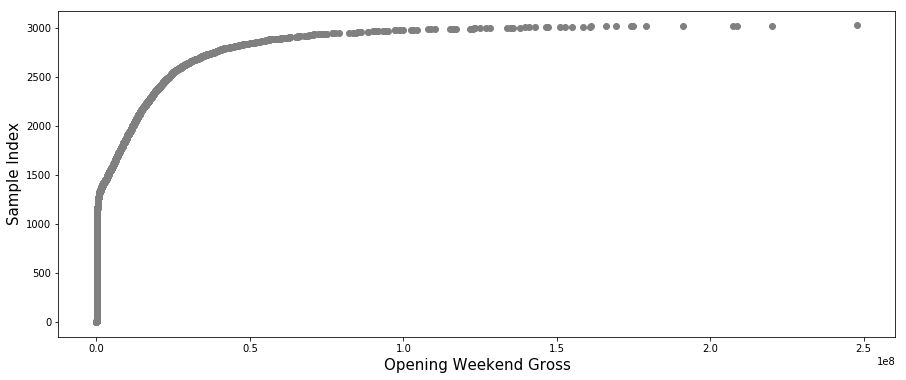

In [10]:
plt.figure(figsize=(15,6))
plt.ylabel('Sample Index',fontsize=15)
plt.xlabel('Opening Weekend Gross',fontsize=15)
plt.scatter(opening_weekend_gross.sort_values(), range(len(opening_weekend_gross)), color="grey")
plt.show()

# 4 Models
## 4.1 Features Extraction
At first we try to predict opening week box office based on 'Director', 'Runtime', 'Released', 'Actors'

In these features, some are numerical but others are nominal, we can not use nominal features as input to classfication models like logistic regression and SVM, so we use one hot encoding to convert nominal features into numerical one. E.g. for actors, one movie has multiple actors, we gather all actors appeared in the dataset and use every one of it as a feature, movies with actor A is set 1 at feature 'actor A', otherwise 0.



In [11]:
def one_hot_encoding_column(df, col_name, delimiter=','):
    item_map = {}
    item_count = 0
    movie_size = len(df)
    for i in range(movie_size):
        items = str(df[col_name].iloc[i])
        items_arr = items.split(delimiter)
        for item in items_arr:
            item = item.strip()
            if item not in item_map:
                item_map[item] = item_count
                item_count += 1

    Matrix = [[0 for x in range(item_count)] for y in range(movie_size)] 
    for i in range(movie_size):
        items = str(df[col_name].iloc[i])
        items_arr = items.split(delimiter)
        for item in items_arr:
            item = item.strip()
            idx = item_map[item]

            Matrix[i][idx] = 1
    return item_map, np.asarray(Matrix)

actors_map, actors_Matrix = one_hot_encoding_column(dataset, 'Actors')
for i in list(actors_map.keys())[:5]:
    print(i,actors_map[i])
actors_Matrix

Sam Worthington 0
Zoe Saldana 1
Sigourney Weaver 2
Stephen Lang 3
Shia LaBeouf 4


array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

At first, we need to clean the dataset to simpler format because original dataset has more complicated format in it, which can not be used directly.

In [12]:
df = pd.read_csv('result.csv',index_col=['imdbID'], header=0)
df = df[np.isfinite(df['Opening Weekend USA'])]
df['Production'] = [d.replace('/',',') for d in df['Production']]
df['Director'] = [d.replace('(co-director)','') for d in df['Director']]
df['Runtime'] = df['Runtime'].replace( 'min','', regex=True ).astype(int)
df['Released'] = [a[3:6] for a in df['Released']]
df['imdbRating'] = [round(r * 2) / 2 for r in df['imdbRating']]
df['Oscar'] = [int(str.find('Oscar') > 0) for str in df['Awards']]


As mentioned above, box offices are not scaled (with skew to the right), so log function is applied here to smooth the earnings. Also, as we said, we plan to use a recent year as our test set. So we set up our test matrix to use movies in 2017, and everything else as our training data.

In [13]:
def get_log_label (bins, box_office_value):
    log_val = np.log(box_office_value)
    for i in range(len(bins[1])):
        if bins[1][i] <= log_val and log_val <= bins[1][i+1]:
            return i
    return len(bins[1]) - 1

You might have noticed that most of the features are composed of multiple/grouped values. We previously mentioned the "Actors" column, where we have 4 leading/supporting actors. Beyond that, a film can be co-directed by multiple directors, made by 2 production companies, having 2-3 different genres and be published in several languages. Here we write the helper function to setup a prediction matrix by unraveling each of the columns we are interested in. 

In [14]:
def setup_prediction_matrix (bins, column_names, year):
    
    labels = [get_log_label(bins, o) for o in df['Opening Weekend USA']]
    encoded_matrix = []
    for column in column_names:
        column_map, column_Matrix = one_hot_encoding_column(df, column)
        encoded_matrix.append(column_Matrix)
        
    t_Matrix = np.concatenate(encoded_matrix, axis=1)     
    x_train = t_Matrix[df['Year'] != year]
    x_test = t_Matrix[df['Year'] == year ]
    y_train = np.array(labels)[df['Year'] != year]
    y_test = np.array(labels)[df['Year'] == year ]
    
    return x_train, x_test, y_train, y_test

We applied three models on our features: logistic regression, decision tree and random forest. We can manually pass in the bin-size, which is the number of classfied labels each representing a range of the box office values. If we pass in 2 as bin-size, it would be the most basic binary classifer to draw the cheap line. For bin size greater than 2, it basically classifies movies up to the nth tier. 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def logistic_regression_model (bin_size, column_names, year, verbose=False):
    bins = plt.hist(np.log(df['Opening Weekend USA']), bin_size)
    x_train, x_test, y_train, y_test = setup_prediction_matrix (bins,column_names, year)
    clf_l2_LR = LogisticRegression(multi_class="multinomial", solver = 'lbfgs', \
        class_weight ='balanced', random_state = 2)
    clf_l2_LR.fit(x_train, y_train)
    y_predit = clf_l2_LR.predict(x_test)
    print ("Logistic regression with:", bin_size, "label classes,", "accuracy:", np.mean(y_predit == y_test))
    plt.close()
    return bins 
    
    
def decision_tree_model (bin_size,column_names, year, verbose=False):
    bins = plt.hist(np.log(df['Opening Weekend USA']), bin_size)
    x_train, x_test, y_train, y_test = setup_prediction_matrix (bins,column_names, year)
    
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    y_predit = DTC.predict(x_test)
    print ("Decision Tree with:", bin_size, "label classes,", "accuracy:", np.mean(y_predit == y_test))
    plt.close()
    return bins, DTC

def random_forest_model (bin_size,column_names, year, verbose=False):
    bins = plt.hist(np.log(df['Opening Weekend USA']), bin_size)
    x_train, x_test, y_train, y_test = setup_prediction_matrix (bins,column_names, year)
    
    CLF = RandomForestClassifier()
    CLF.fit(x_train, y_train)
    y_predit = CLF.predict(x_test)
    print ("Random Forest with:", bin_size, "label classes,", "accuracy:", np.mean(y_predit == y_test))
    plt.close()
    return bins, CLF

    
def show_bins(bins):
     for i in range(len(bins[0])):
        print ("label", i+1 , ":",  np.exp(bins[1][i]), '-' ,np.exp(bins[1][i+1]), "," , str(bins[0][i]) , "movies")
    
features = ['Actors','Production', 'Director', 'Country', 'Rated', 'Released', 'Genre']

logistic_regression_model(2, features, 2017)
logistic_regression_model(4, features, 2017)
logistic_regression_model(8, features, 2017)
print ("")
decision_tree_model(2, features, 2017)
decision_tree_model(4, features, 2017)
decision_tree_model(8, features, 2017)
print ("")

random_forest_model(2, features, 2017)
random_forest_model(4, features, 2017)
random_forest_model(8, features, 2017)
print("End of traning.")

Logistic regression with: 2 label classes, accuracy: 0.8294573643410853
Logistic regression with: 4 label classes, accuracy: 0.7441860465116279
Logistic regression with: 8 label classes, accuracy: 0.6356589147286822

Decision Tree with: 2 label classes, accuracy: 0.8449612403100775
Decision Tree with: 4 label classes, accuracy: 0.689922480620155
Decision Tree with: 8 label classes, accuracy: 0.5038759689922481

Random Forest with: 2 label classes, accuracy: 0.8914728682170543
Random Forest with: 4 label classes, accuracy: 0.7209302325581395
Random Forest with: 8 label classes, accuracy: 0.5503875968992248
End of traning.


On the same traning set and test set, random forest model is better then two other models, achieving 89% accuracy when doing binary classfication. As number of classes increases, the accuracy drops, this is an expected trend because as sections become smaller, it is harder to match up the exact class range of the box office of the movies.

Besides prediction of box office, it is also good to know which features are the most influential to box office predication. By knowing these, we may find interesting factors which makes a movie a good or just ordinary. These factores can be important reasons of investment and moviegoers' decisions. So we print out importances of features in decision tree, specifically on features that we are interested about like production and genre. 

In [16]:
def feature_importance_study(column_name, year, df, bin_size, n):
    
    def recover_key(dicty, value):
        for a_key in dicty.keys():
            if (dicty[a_key] == value):
                return a_key

    col_map, col_matrix = one_hot_encoding_column(df, column_name)
    bins, CLF = decision_tree_model(n, [column_name], year)

    importances = CLF.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("Feature ranking for:", column_name)
    cc = 0
    for f in range(col_matrix.shape[1]):
        print("%d. %s (%f)" % (f + 1, recover_key(col_map, indices[f]), importances[indices[f]]))  
        if cc == n:
            break
        cc += 1
    print ("")

feature_importance_study ("Production", 2017, df, 4, 3)
feature_importance_study ("Genre", 2017, df, 4, 3)
feature_importance_study ("Actors", 2017, df, 8, 3)
feature_importance_study ("Director", 2017, df, 4, 3)
feature_importance_study ("Released", 2017, df, 4, 3)

Decision Tree with: 3 label classes, accuracy: 0.8217054263565892
Feature ranking for: Production
1. Sony Pictures Classics (0.084816)
2. Universal Pictures (0.051247)
3. Warner Bros. Pictures (0.051029)
4. 20th Century Fox (0.049313)

Decision Tree with: 3 label classes, accuracy: 0.7441860465116279
Feature ranking for: Genre
1. Drama (0.506969)
2. Action (0.053715)
3. Biography (0.049196)
4. Romance (0.042124)

Decision Tree with: 3 label classes, accuracy: 0.6356589147286822
Feature ranking for: Actors
1. Kristin Scott Thomas (0.004973)
2. Adam Sandler (0.004208)
3. Johnny Depp (0.004190)
4. Cameron Diaz (0.004106)

Decision Tree with: 3 label classes, accuracy: 0.5736434108527132
Feature ranking for: Director
1. Tyler Perry (0.005018)
2. Gus Van Sant (0.003602)
3. Ridley Scott (0.002848)
4. Shawn Levy (0.002830)

Decision Tree with: 3 label classes, accuracy: 0.6201550387596899
Feature ranking for: Released
1. Jan (0.364891)
2. Sep (0.203495)
3. May (0.202065)
4. Apr (0.109755)



As we can tell from the rankings, influential productions are all well-known productions, influential genre are Drame, Action, Biography and Romance, which is not surprising. Also, January is important to box office, we guess because it is in the winter holidays, in the other words, people have more time to watch movies.

### Chances for Awards? ###

As moive junkies ourselves, one of the most exciting moment every year is for the Oscar nominations to be revealed. We are curious about how our model performs to predict whether a certain movie can show up on the Oscar stage.

In [17]:
encoded_matrix = []
for column in features:
    column_map, column_Matrix = one_hot_encoding_column(df,column)
    encoded_matrix.append(column_Matrix)
    
t_Matrix = np.concatenate(encoded_matrix, axis=1)     
x_train = t_Matrix[df['Year'] != 2017]
x_test = t_Matrix[df['Year'] == 2017 ]

y_train = [o for o in df[df['Year']!=2017]['Oscar']]
y_test = [o for o in df[df['Year']==2017]['Oscar']]

clf_l2_LR = LogisticRegression(multi_class="multinomial", solver = 'lbfgs', \
        class_weight ='balanced', random_state = 2)
clf_l2_LR.fit(x_train, y_train)
y_predit = clf_l2_LR.predict(x_test)
prob = clf_l2_LR.predict_proba(x_test)
print ("Accuracy score: ", clf_l2_LR.score(x_test, y_test), "\n")

prediction = {}
for i in range (len(x_test)):
    prediction[df[df['Year']==2017].iloc[i].Title] = (df[df['Year']==2017].iloc[i].Title+ " is " + \
                                                      str(round(prob[i][1] * 100,2)) + "% positive, "\
                                                      + str(round(prob[i][0]*100,2)) + "% negative to go to the Oscar."  )

prediction['Dunkirk']

Accuracy score:  0.8527131782945736 



'Dunkirk is 85.74% positive, 14.26% negative to go to the Oscar.'

## 4.5 Gross Predication
Besides predicting opening weekend box office, we also want to predict gross of a movie. Different from predicting opening weeken box office, we have more features to use in this task like crirtic number, reviews and imdb scores, because in the first week, these features are usually unavailable or not sufficient enough.

In fact, we add four features: 'imdbRating','imdbVotes', 'critic number' and 'user review number', these numbers in some sense show feedback of audiences, which might be valuable for gross prediction. We redifine classes because gross and first week box office are different in scale. We divide gross into 8 classes: \[0,1), [1,2), [2,3), [3,4), [4,5), [5,6), [6,7), >7 (Million) and we try logistic regression, SVM and dicision tree. Random 80% of data are used as traning set, the other are test set.

In [18]:
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

def get_labels_overall(gross):
    gross_classes = np.array([0, 1, 2, 3, 4, 5, 6, 7, float('Inf')]) * 1e8
    
    labels = []
    for i in gross:
        for j in range(len(gross_classes)):
            if gross_classes[j] <= i < gross_classes[j+1]:
                labels.append(j)
    return labels

df = pd.read_csv('result.csv',index_col=['imdbID'], header=0)
#retrieve all candidate features
df = df.loc[:,['imdbRating','imdbVotes', 'critic number', 'user review number', 'Actors','Country', 
               'Genre', 'Production', 'Rated', 'Year', 'Runtime', 'BoxOffice']]
#drop empty row
df = df.dropna(axis=0, how='any')
df = df.reset_index()

df['BoxOffice'] = df['BoxOffice'].replace( '[\$,)]','', regex=True ).astype(float)
df['Runtime'] = df['Runtime'].replace( 'min','', regex=True ).astype(int)
df['imdbVotes'] = df['imdbVotes'].replace( ',','', regex=True ).astype(int)
df['imdbRating'] = df['imdbRating']
#shuffle data to get random test set and traning set
df = shuffle(df)

movie_size = (len(df))
test_size = int(movie_size/5)
sample_size = movie_size - test_size
#divide gross into classes
labels = get_labels_overall(df['BoxOffice'])

#####
#one hot encoding nominal features
actors_map, actors_Matrix = one_hot_encoding_column(df, 'Actors')
genre_map, genre_Matrix = one_hot_encoding_column(df, 'Genre')
contry_map, country_Matrix = one_hot_encoding_column(df, 'Country')
production_map, production_Matrix = one_hot_encoding_column(df, 'Production')
rated_map, rated_Matrix = one_hot_encoding_column(df, 'Rated')
#####
#normalize numerical features
numerical_features = normalize(df.loc[:, ['Year', 'Runtime','imdbRating','imdbVotes', 'critic number', 'user review number']].as_matrix(), axis=0) 

t_Matrix = np.concatenate((actors_Matrix, 
                           genre_Matrix,
                           country_Matrix, 
                           production_Matrix,
                           rated_Matrix,
                           numerical_features
                          ), axis=1)

x_train = t_Matrix[:sample_size]
x_test = t_Matrix[sample_size: ]

y_train = np.array(labels[:sample_size])
y_test = np.array(labels[sample_size: ])

print ("Finished Setting up testing and training set:")
values = []

#Logistic Regression Model
clf_l2_LR = LogisticRegression(multi_class="multinomial", solver = 'lbfgs')
clf_l2_LR.fit(x_train, y_train)
y_predit = clf_l2_LR.predict(x_test)
print("Logistic Regression Validation accuracy:", np.mean(y_predit==y_test))
values.append(np.mean(y_predit==y_test))

#Support Vector Machine Model
clf = SVC()
clf.fit(x_train, y_train)
y_p = clf.predict(x_test)
print("SVM Validation accuracy:", np.mean(y_p==y_test))
values.append(np.mean(y_predit==y_test))

#Decision Tree Model
clf_tree = DecisionTreeClassifier(max_depth=5)
clf_tree.fit(x_train, y_train)
y_p = clf_tree.predict(x_test)
print("Decision Tree Validation accuracy:", np.mean(y_p==y_test))
values.append(np.mean(y_predit==y_test))

Finished Setting up testing and training set:
Logistic Regression Validation accuracy: 0.8739770867430442
SVM Validation accuracy: 0.8772504091653028
Decision Tree Validation accuracy: 0.8936170212765957


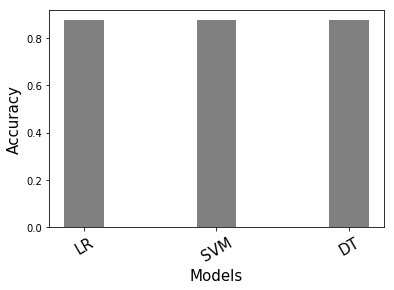

In [19]:
keys = ['LR', 'SVM', 'DT']
index = range(len(keys))
ax=plt.subplot(111)
plt.bar(index, values, 0.3, color="grey")
plt.xticks(index, keys, fontsize=15, rotation=30)
plt.ylabel('Accuracy',fontsize=15)
ax.set_xlabel("Models",fontsize=15)
plt.show()

There is not much difference among three models, decision tree achieve slightly higher accuracy. We randomly select our test set and traning set, so the result may varies a little, but generally speaking, we achieve better accuracy in this task than in opening week box office predication. This result makes sense because considering 4 features we added: 'imdbRating','imdbVotes', 'critic number', 'user review number'. 'imdbRating' indicates how audiences think of a movie; 'imdbVotes' is a good indicator of how many people have watched this movie which is very relevant to the final box office; 'critic number' shows how bad people think of this movie and 'user review number' in some sense shows whether this is a popular movie whatever because it is awful or excellent. For finding what is the most influential features in this task, we sort the importances index of decision tree and pick up the first 5 most important features.

In [20]:
feature_importances = [(val, i)for i, val in enumerate(clf_tree.feature_importances_)]
sorted(feature_importances, reverse=True)[:6]

[(0.6001950530627136, 6658),
 (0.11156004217803901, 6647),
 (0.0645423527617098, 6657),
 (0.048685377205802315, 6076),
 (0.03550194587869856, 6660),
 (0.02696449343612505, 6209)]

From high to low importance, these features are:<br>
'imdbVotes'<br>
'R'(Rated)<br>
'PG'(Rated)<br>
'Adventure'<br>
'user review number'<br>
'imdbRating'<br>
This result verifies that aforementioned four features are valuable as we expected, only 'critic number' does not appear in top 6. And imdbVotes have greate influence in decision tree model, as we explained, this features includes the information of how many people view this movie at the time.